In [1]:
import pandas as pd
import os

In [2]:
import seaborn as sns

In [3]:
data_dir = "./data/"

In [15]:
datasets = os.listdir(data_dir)
dfs = []
for dataset in datasets:
    df = pd.read_csv(data_dir+dataset)
    df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
    df['ds'] = df['ds']-df['ds'].min()
    df['ds'] = pd.to_datetime(df['ds'], unit='s')
    df['type'] = dataset.split('_')[-1]
    dfs.append(df)
merged = pd.concat(dfs).reset_index()

In [16]:
merged.type.unique()

array(['growth2.csv', '100.csv', '40.csv', '5.csv'], dtype=object)

<AxesSubplot:xlabel='ds', ylabel='y'>

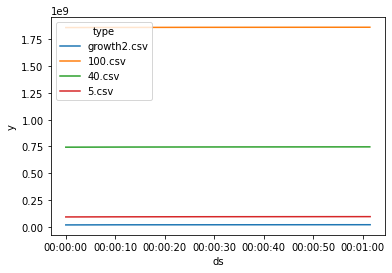

In [17]:
sns.lineplot(data=merged, x='ds', y='y', hue='type')

<AxesSubplot:xlabel='ds', ylabel='y'>

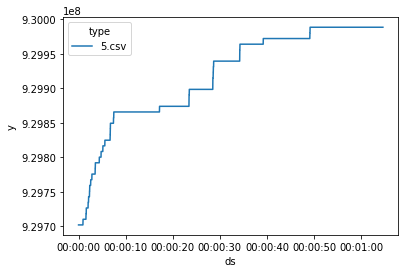

In [21]:
df = pd.read_csv(data_dir+'tpcc_table_growth_scalefac50autovacuum.csv')
df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')
df['type'] = dataset.split('_')[-1]
sns.lineplot(data=df, x='ds', y='y', hue='type')

## Autovacuum enabled

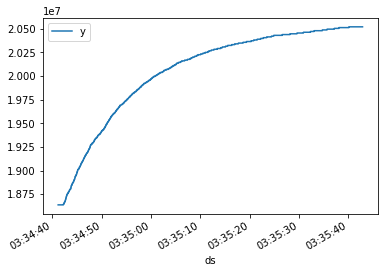

In [3]:
df.plot(x='ds', y='y')

## Autovacuum disabled

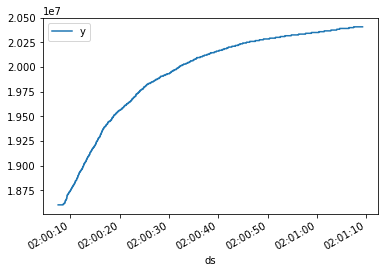

In [4]:
df2.plot(x='ds', y='y')

In [4]:
df = pd.read_csv('./data/azvm/noautovac_ycsb_scale_50_worktime_600_samplefreq_1_tsizeAnddeadtuple_pgconfig.csv')

In [5]:
df.head()

,ds,table_name,relid,schemaname,relname,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,...,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count,pg_table_size
0,1.650405e+09,public.usertable,17783,public,usertable,1,0,0,0,50000,...,50000,NaN,NaN,NaN,NaN,0,0,0,0,58556416
1,1.650405e+09,public.usertable,17783,public,usertable,1,0,0,0,50000,...,50000,NaN,NaN,NaN,NaN,0,0,0,0,58712064
2,1.650405e+09,public.usertable,17783,public,usertable,1,0,0,0,50000,...,50000,NaN,NaN,NaN,NaN,0,0,0,0,59351040
3,1.650405e+09,public.usertable,17783,public,usertable,1,0,0,0,50000,...,50000,NaN,NaN,NaN,NaN,0,0,0,0,59965440
4,1.650405e+09,public.usertable,17783,public,usertable,1,0,0,0,50000,...,50000,NaN,NaN,NaN,NaN,0,0,0,0,60620800


In [6]:
df.table_name.unique()

array(['public.usertable'], dtype=object)

In [7]:
df.columns

Index(['ds', 'table_name', 'relid', 'schemaname', 'relname', 'seq_scan',
       'seq_tup_read', 'idx_scan', 'idx_tup_fetch', 'n_tup_ins', 'n_tup_upd',
       'n_tup_del', 'n_tup_hot_upd', 'n_live_tup', 'n_dead_tup',
       'n_mod_since_analyze', 'n_ins_since_vacuum', 'last_vacuum',
       'last_autovacuum', 'last_analyze', 'last_autoanalyze', 'vacuum_count',
       'autovacuum_count', 'analyze_count', 'autoanalyze_count',
       'pg_table_size'],
      dtype='object')

In [8]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [9]:
def plot_growth(df, col):
#     df['ds'] = df['ds']-df['ds'].min()
#     df['ds'] = pd.to_datetime(df['ds'], unit='s')
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

<AxesSubplot:>

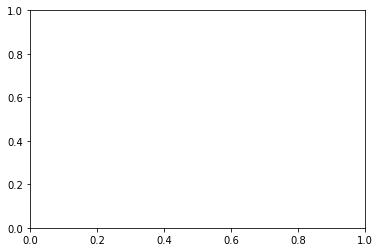

In [10]:
df1 = df[df['table_name'] == 'public.votes']
plot_growth(df1.copy(), 'n_dead_tup')

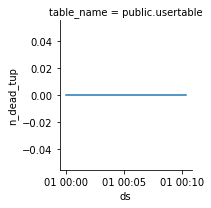

In [11]:
g = sns.FacetGrid(df, row='table_name', sharey=False)
g.map(sns.lineplot, "ds", "n_dead_tup")

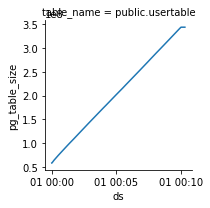

In [12]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

<AxesSubplot:xlabel='ds', ylabel='pg_table_size'>

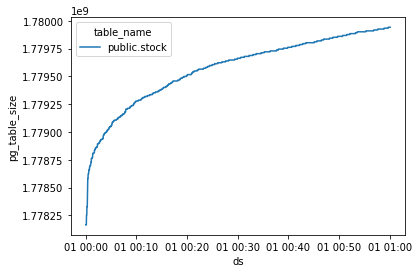

In [104]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'pg_table_size')

<AxesSubplot:xlabel='ds', ylabel='n_dead_tup'>

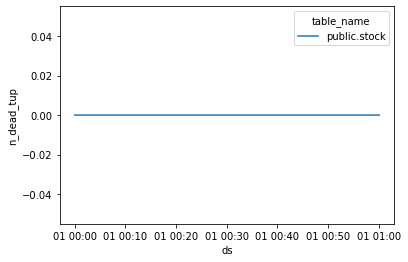

In [105]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')